<h1 align="center"> By Dhayanithi T </b> </h1><br>

<h1 align="center"> HR Analysis and Visualization </b> </h1><br>
<img src=https://global-uploads.webflow.com/602250ed045ee75512d753ec/641408ae50fd8017c1d5af94_What%20is%20Employee%20Attrition%20Types%2C%20Strategies%20%26%20Case%20Studies.webp>


# Breakdown of this notebook:
1) **Importing the Libraries**

2) **Loading the dataset**

3) **Understanding the Attrition Problem and the Dataset**

4) **Data Visualization:**   
   - Plot a correlation map for all numeric variables
   - Marital Status
   - Job Role
   - Gender
   - Education Field
   - Department
   - Buisness Travel
   - Relation between Attrition and Age
   - Total Working Years
   - Education Level
   - Number of Companies Worked
   - Distance from Home


# Understanding the Attrition Problem and the Dataset

HR Analytics aids in the interpretation of organisational data. It identifies people-related trends in data and assists the HR Department in taking the necessary steps to keep the organisation functioning effectively and profitably.Attrition is one of the numerous challenges that people managers and HR staff must deal with in a business setting.

Interestingly, machine learning models can be used to forecast possible attrition scenarios, assisting HR personnel in taking the required efforts to retain the employee.


# Importing Essentials

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('Attrition data.csv')
df.shape

(4410, 29)

In [3]:
df.sample(5)

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
1901,1902,20,Yes,Travel_Rarely,Research & Development,29,3,Life Sciences,1,Female,3,Laboratory Technician,Single,27070,1.0,Y,11,8,0,1.0,2,1,0,0,1.0,1.0,3.0,3,3
3453,3454,54,No,Travel_Rarely,Research & Development,5,3,Medical,1,Female,2,Manufacturing Director,Married,24780,6.0,Y,11,8,0,13.0,0,9,7,0,3.0,3.0,3.0,3,3
4301,4302,19,No,Travel_Rarely,Research & Development,1,3,Other,1,Female,5,Manufacturing Director,Single,152020,1.0,Y,18,8,3,1.0,2,1,0,0,2.0,2.0,3.0,2,3
688,689,40,Yes,Travel_Rarely,Sales,8,1,Other,1,Male,1,Laboratory Technician,Single,59850,2.0,Y,13,8,3,9.0,1,5,1,0,4.0,2.0,3.0,2,3
3089,3090,45,No,Travel_Rarely,Research & Development,2,3,Medical,1,Female,1,Sales Executive,Married,50980,3.0,Y,14,8,1,8.0,4,2,0,2,1.0,4.0,2.0,3,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeID,4410.0,2205.500000,1273.201673,1.0,1103.25,2205.5,3307.75,4410.0
Age,4410.0,36.923810,9.133301,18.0,30.00,36.0,43.00,60.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.00,7.0,14.00,29.0
Education,4410.0,2.912925,1.023933,1.0,2.00,3.0,4.00,5.0
EmployeeCount,4410.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
JobLevel,4410.0,2.063946,1.106689,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.0,29110.00,49190.0,83800.00,199990.0
NumCompaniesWorked,4391.0,2.694830,2.498887,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,4410.0,15.209524,3.659108,11.0,12.00,14.0,18.00,25.0
StandardHours,4410.0,8.000000,0.000000,8.0,8.00,8.0,8.00,8.0


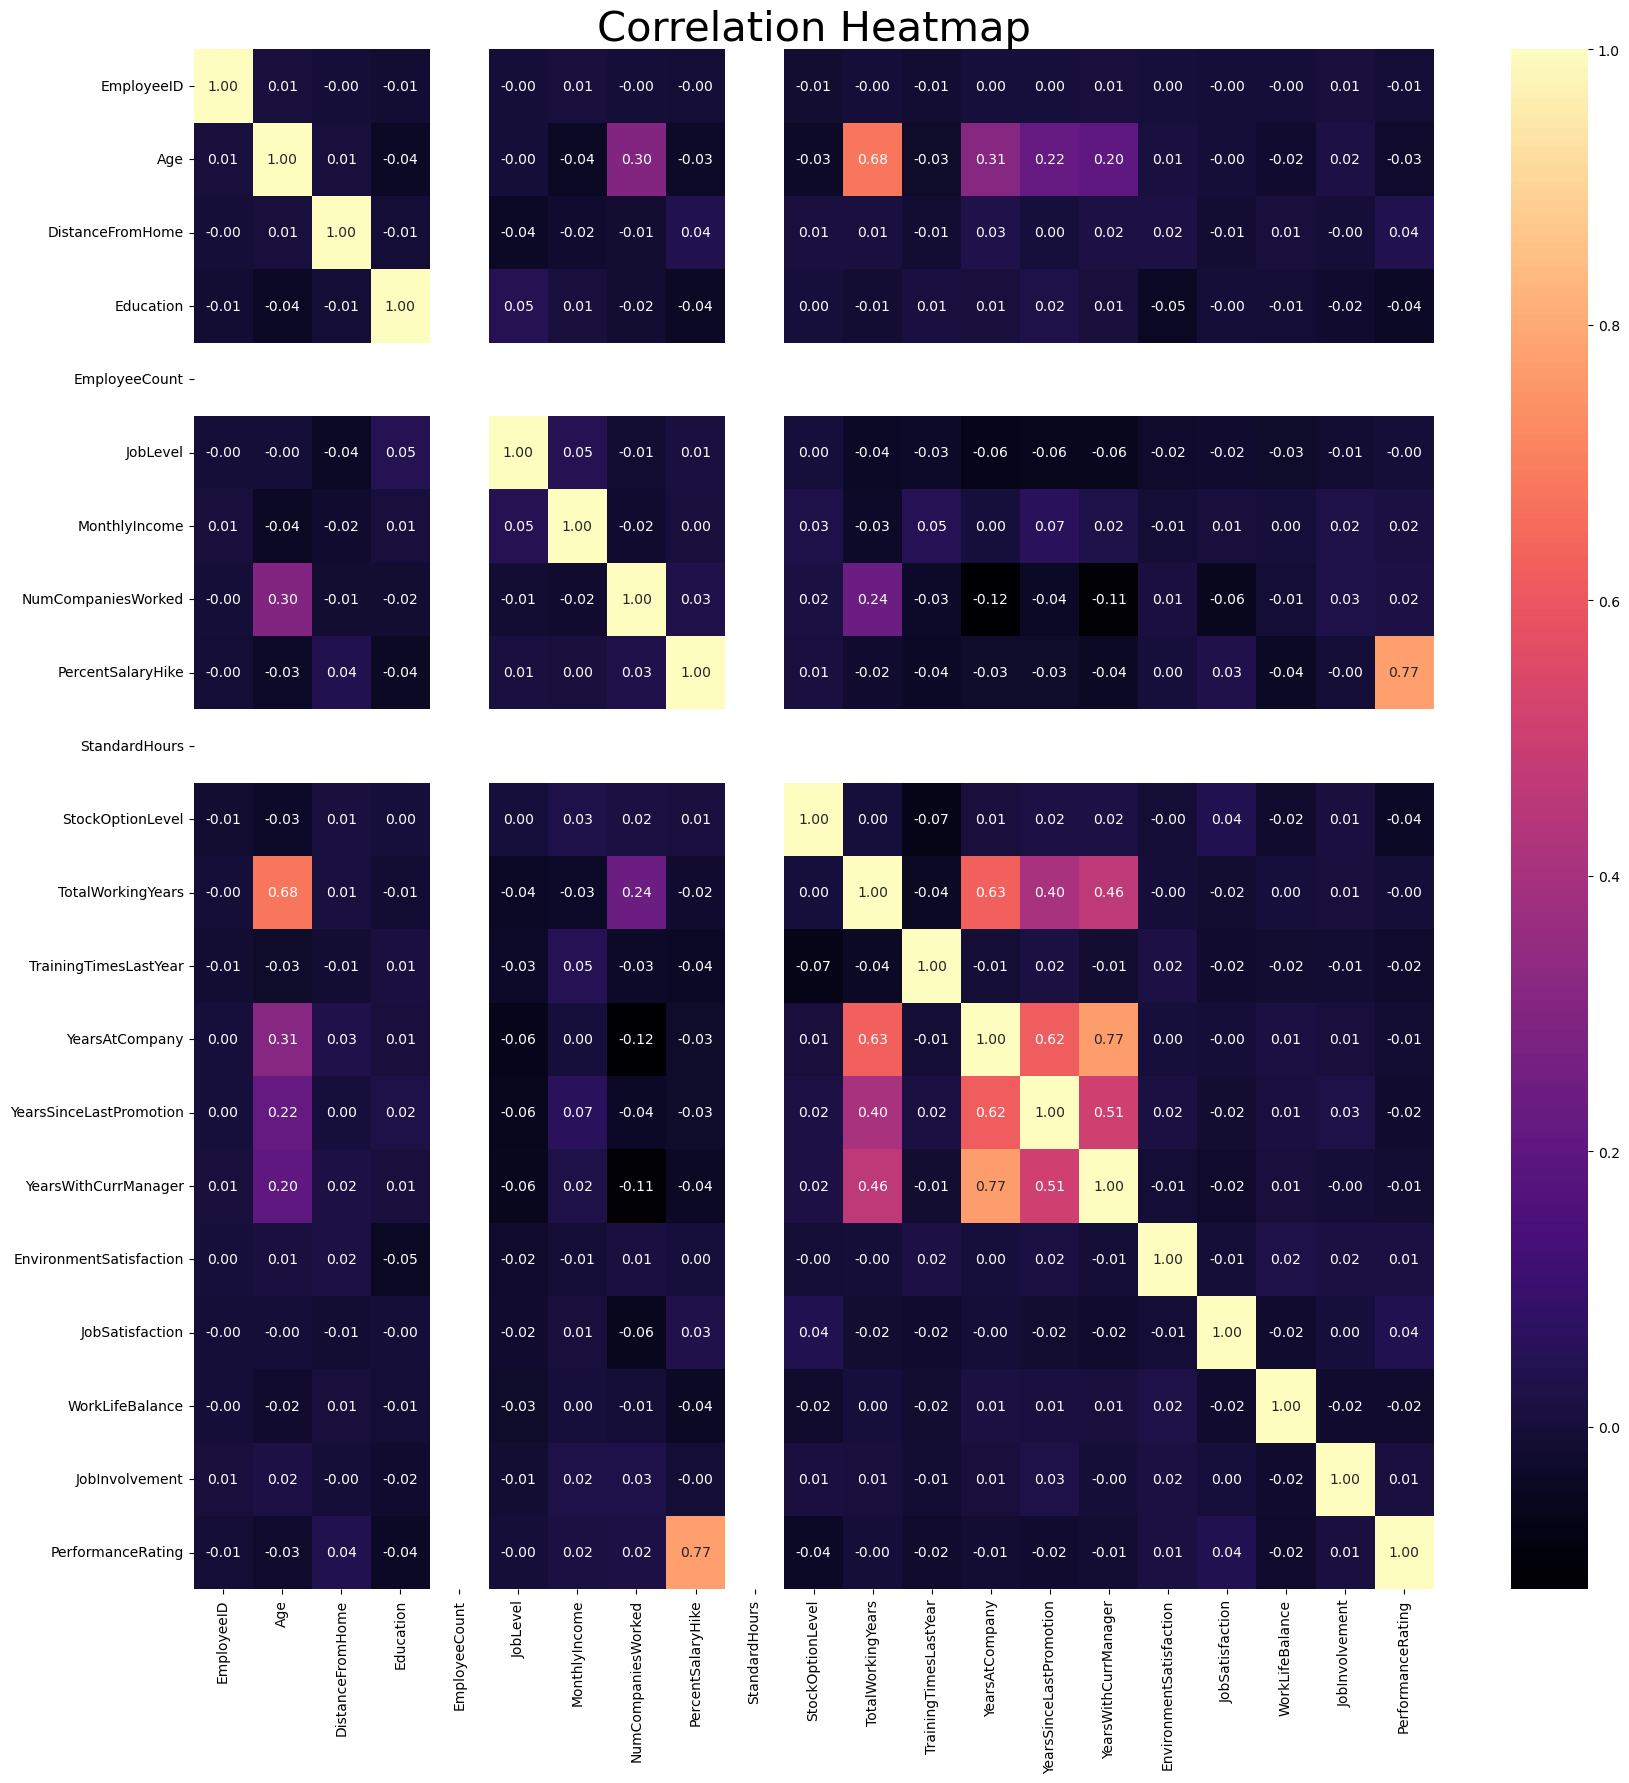

In [6]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='magma')
plt.title('Correlation Heatmap', fontsize=30)
plt.show()

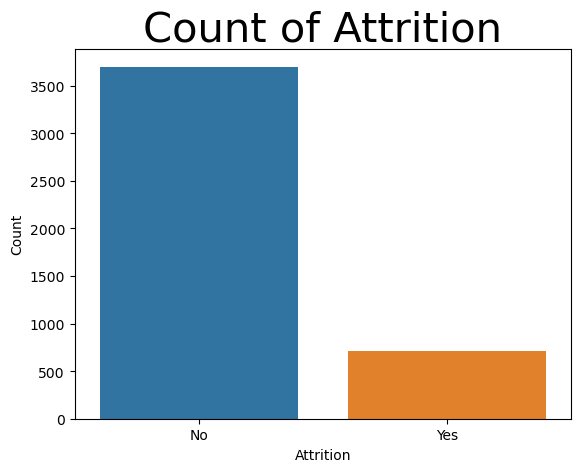

In [7]:
sns.countplot('Attrition', data=df)
plt.title('Count of Attrition', fontsize=30)
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

In [8]:
categorical_cols = [feature for feature in df.columns if df[feature].dtypes=='object']
df[categorical_cols].sample(5)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18
278,No,Travel_Rarely,Research & Development,Life Sciences,Female,Laboratory Technician,Single,Y
1096,Yes,Travel_Rarely,Human Resources,Medical,Female,Sales Executive,Single,Y
4113,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manager,Married,Y
3465,No,Travel_Rarely,Sales,Life Sciences,Female,Research Director,Married,Y
1434,No,Travel_Frequently,Sales,Life Sciences,Male,Laboratory Technician,Divorced,Y


In [9]:
numerical_cols = [feature for feature in df.columns if df[feature].dtypes!='object']
df[numerical_cols].sample(5)

,EmployeeID,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
4140,4141,35,14,1,1,2,79880,1.0,18,8,0,4.0,3,4,1,1,3.0,4.0,3.0,3,3
3343,3344,43,7,4,1,2,48760,4.0,16,8,2,4.0,4,1,0,0,1.0,2.0,4.0,3,3
3883,3884,23,6,3,1,3,49690,1.0,12,8,0,5.0,3,5,1,2,4.0,3.0,3.0,3,3
3738,3739,28,2,3,1,1,22740,3.0,20,8,1,5.0,5,3,1,2,1.0,3.0,4.0,3,4
58,59,49,1,3,1,3,73140,7.0,22,8,0,25.0,2,7,0,7,3.0,3.0,3.0,3,4


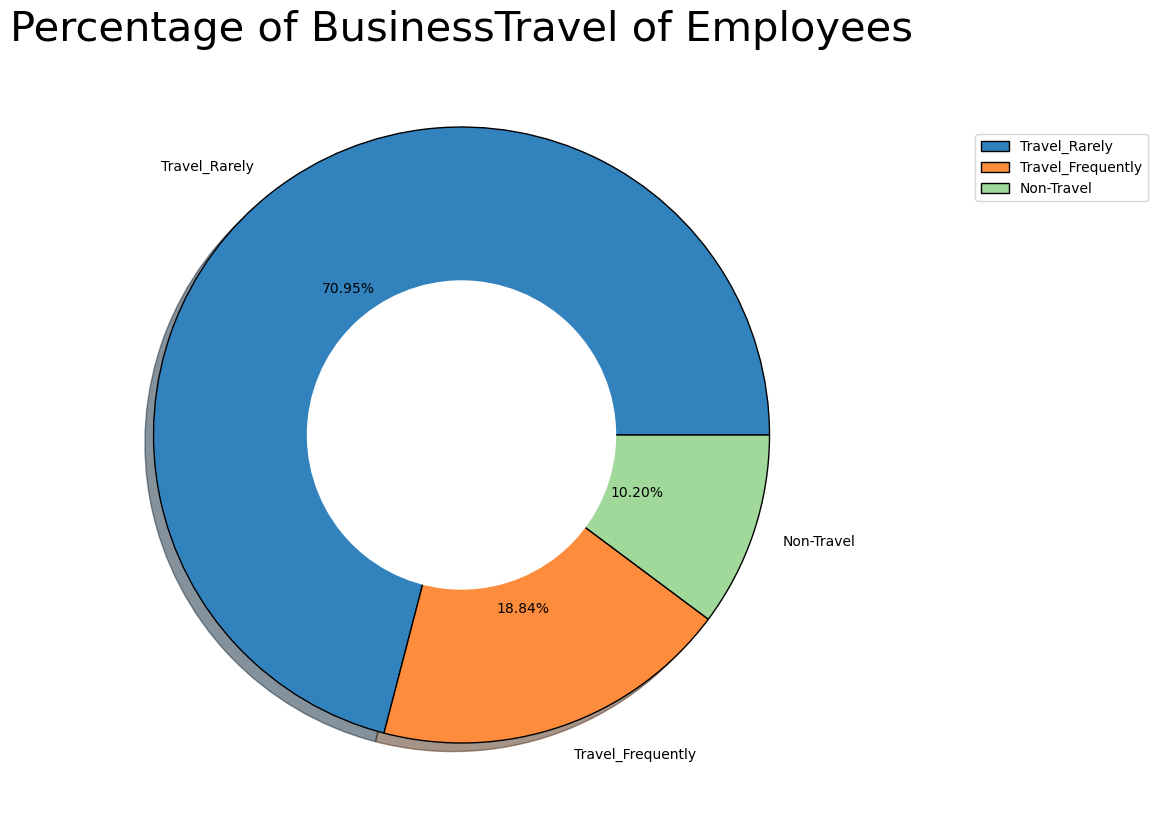

In [10]:
size = df['BusinessTravel'].value_counts()
labels = df['BusinessTravel'].unique()
colors = plt.cm.tab20c(np.linspace(0, 1, 5))  # Using tab20c colormap for different colors

plt.figure(figsize=(10, 10))
circle = plt.Circle((0, 0), radius=0.5, color='white')
plt.pie(size, colors=colors, labels=labels, shadow=True, autopct='%.2f%%', wedgeprops={'edgecolor': 'black'})
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('Percentage of BusinessTravel of Employees', fontsize=30)
plt.legend(bbox_to_anchor=(0.5, 0., 0.9, 0.9))
plt.show()


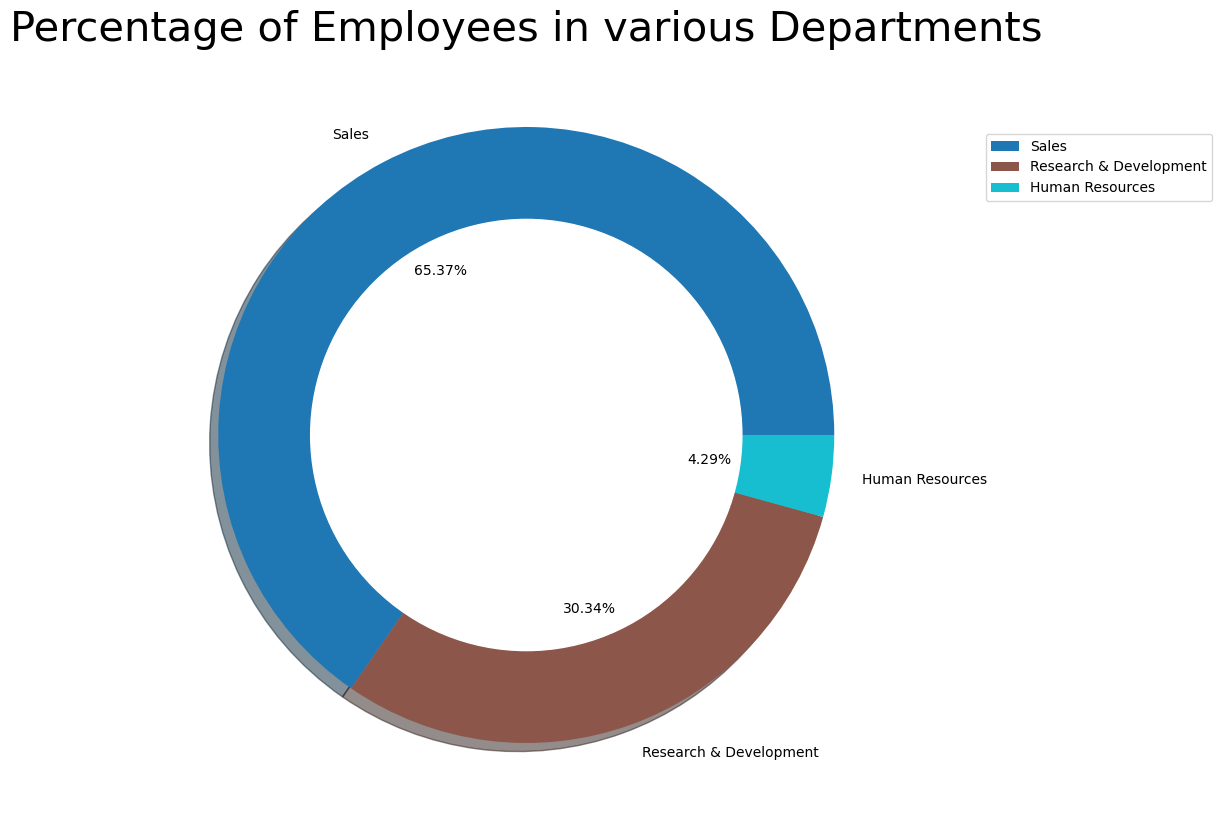

In [11]:
size = df['Department'].value_counts()
labels = df['Department'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(labels)))  # Using tab10 colormap for different colors

plt.figure(figsize=(10, 10))
circle = plt.Circle((0, 0), radius=0.7, color='white')
plt.pie(size, colors=colors, labels=labels, shadow=True, autopct='%.2f%%')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('Percentage of Employees in various Departments', fontsize=30)
plt.legend(bbox_to_anchor=(0.5, 0., 0.9, 0.9))
plt.show()


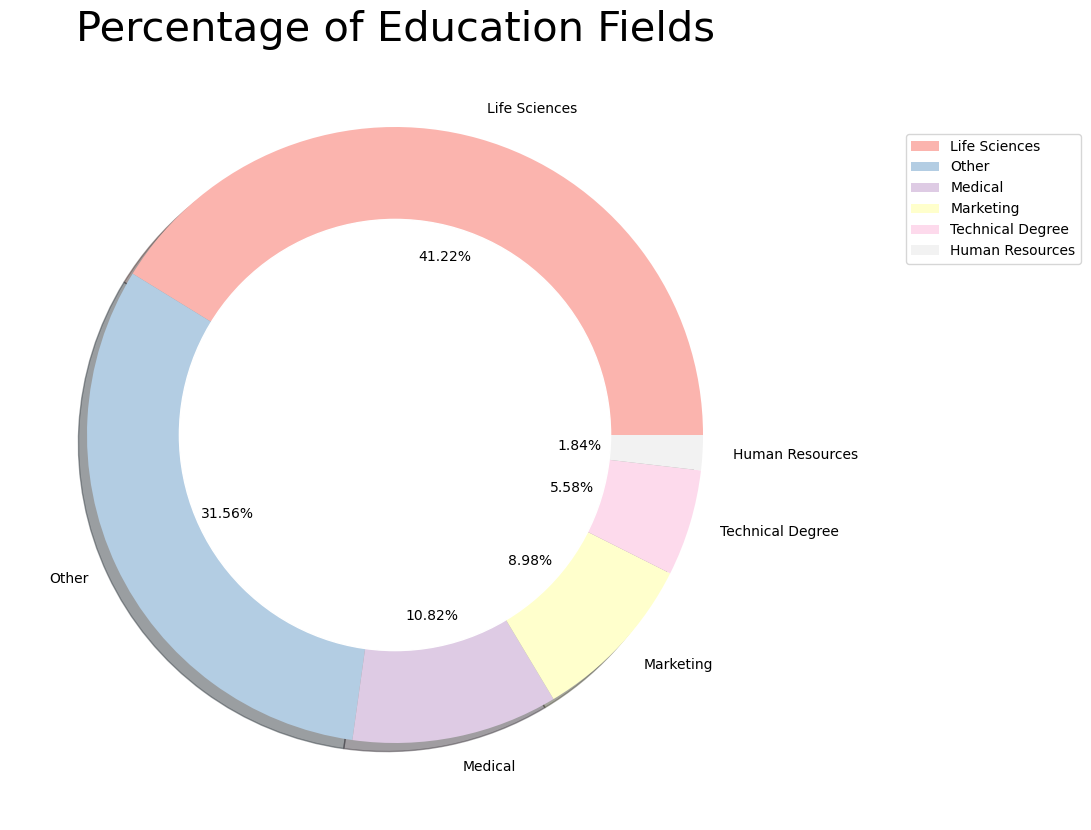

In [12]:
size = df['EducationField'].value_counts()
labels = df['EducationField'].unique()
colors = plt.cm.Pastel1(np.linspace(0, 1, len(labels)))  # Using Pastel1 colormap for different colors

plt.figure(figsize=(10, 10))
circle = plt.Circle((0, 0), radius=0.7, color='white')
plt.pie(size, colors=colors, labels=labels, shadow=True, autopct='%.2f%%')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('Percentage of Education Fields', fontsize=30)
plt.legend(bbox_to_anchor=(0.5, 0., 0.9, 0.9))
plt.show()


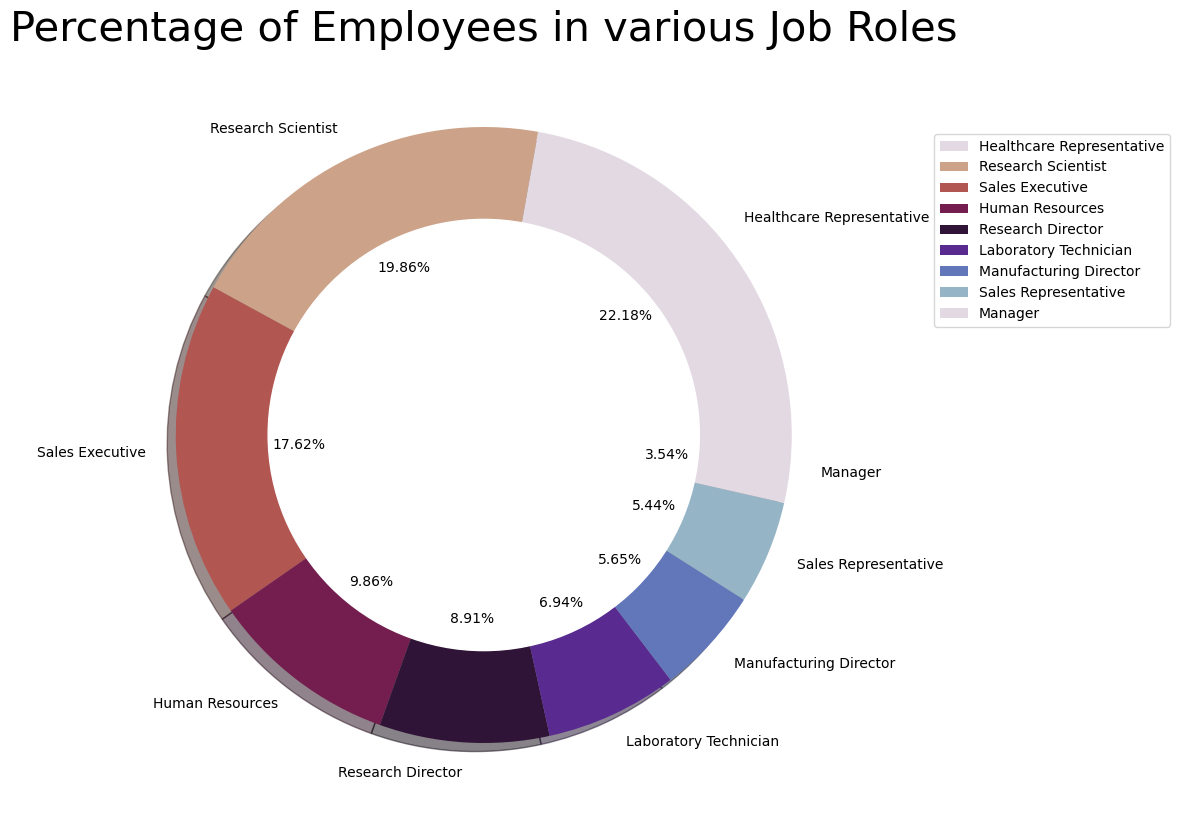

In [13]:
size = df['JobRole'].value_counts()
labels = df['JobRole'].unique()
colors = plt.cm.twilight_r(np.linspace(0,1,9))

plt.figure(figsize=(10,10))
circle = plt.Circle((0,0), radius=0.7, color='white')
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('Percentage of Employees in various Job Roles', fontsize=30)
plt.legend(bbox_to_anchor=(0.5, 0., 0.9, 0.9));

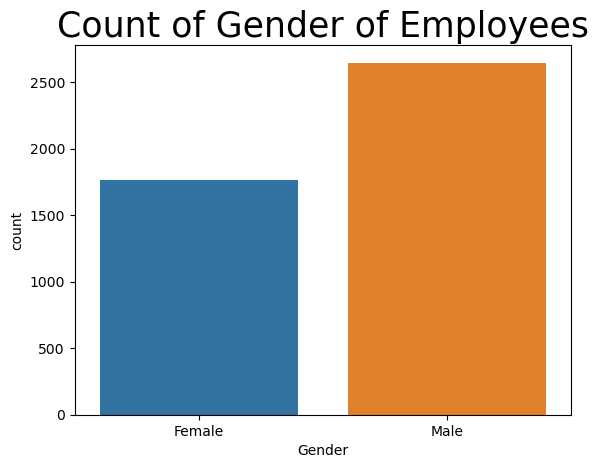

In [14]:
sns.countplot('Gender', data=df)
plt.title('Count of Gender of Employees', fontsize=25)
plt.xlabel('Gender')
plt.show()

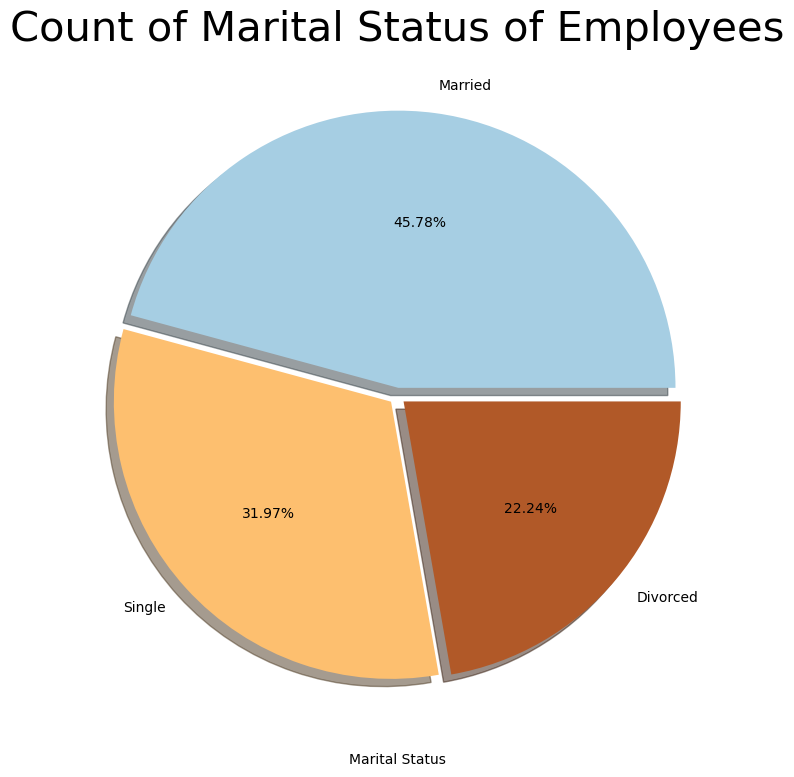

In [15]:
size = df['MaritalStatus'].value_counts()
labels = df['MaritalStatus'].unique()
colors = plt.cm.Paired(np.linspace(0, 1, len(labels)))  # Using Paired colormap for different colors
explode = [0.03, 0.03, 0.03]

plt.figure(figsize=(9, 9))
plt.pie(size, colors=colors, labels=labels, explode=explode, autopct='%.2f%%', shadow=True)
plt.title('Count of Marital Status of Employees', fontsize=30)
plt.xlabel('Marital Status')
plt.show()


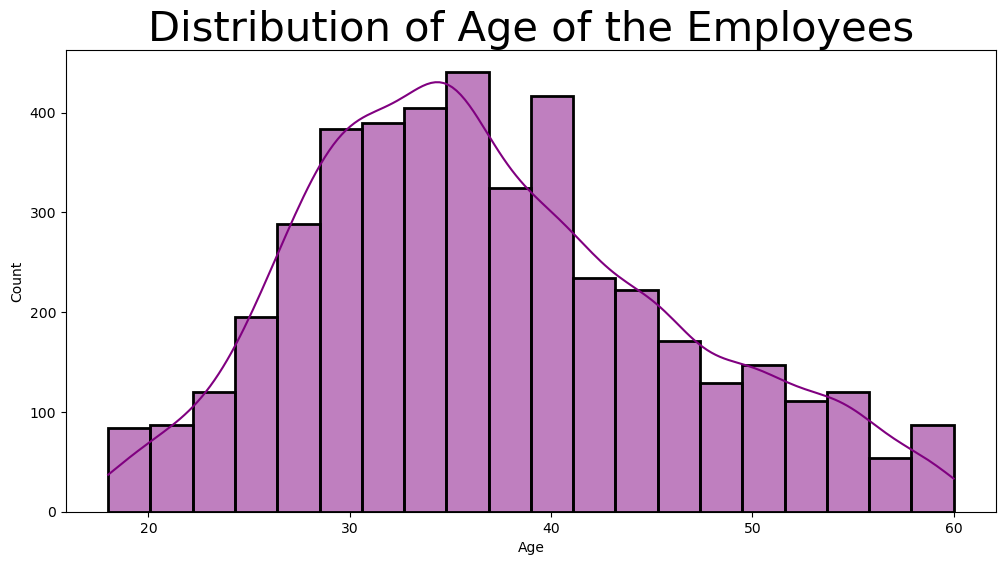

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='purple', edgecolor='black', linewidth=2)
plt.title('Distribution of Age of the Employees', fontsize=30)
plt.xlabel('Age')
plt.show()


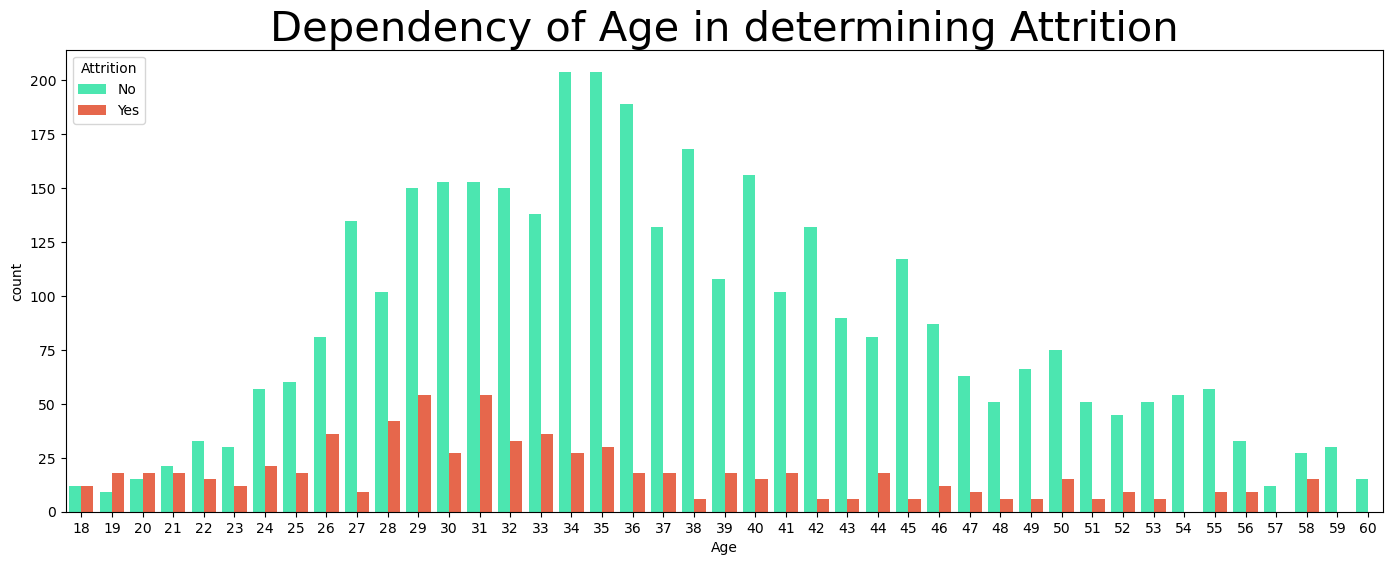

In [17]:
custom_colors = ['#33FFB8', '#FF5733']  # Replace these colors with your desired colors

plt.figure(figsize=(17, 6))
sns.countplot(x='Age', hue='Attrition', data=df, palette=custom_colors)
plt.title('Dependency of Age in determining Attrition', fontsize=30)
plt.xlabel('Age')
plt.show()


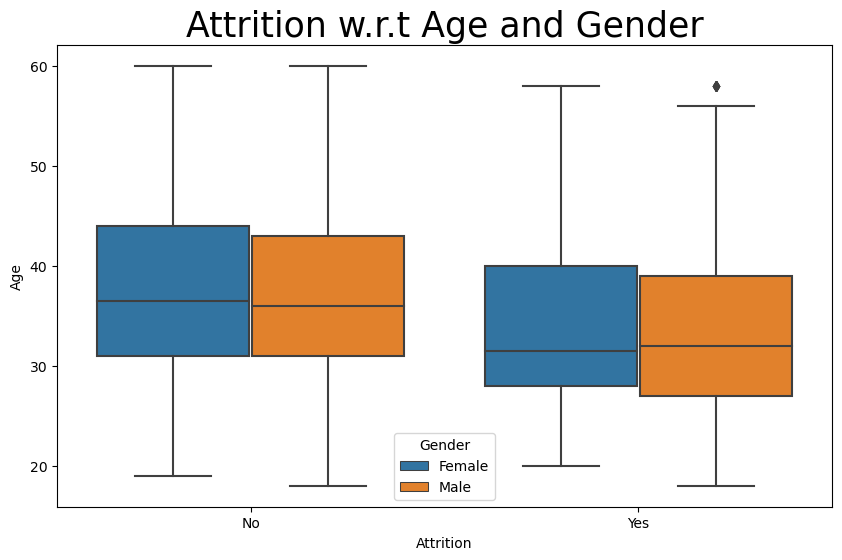

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot('Attrition', 'Age', hue='Gender', data=df)
plt.title('Attrition w.r.t Age and Gender', fontsize=25)
plt.xlabel('Attrition')
plt.show()

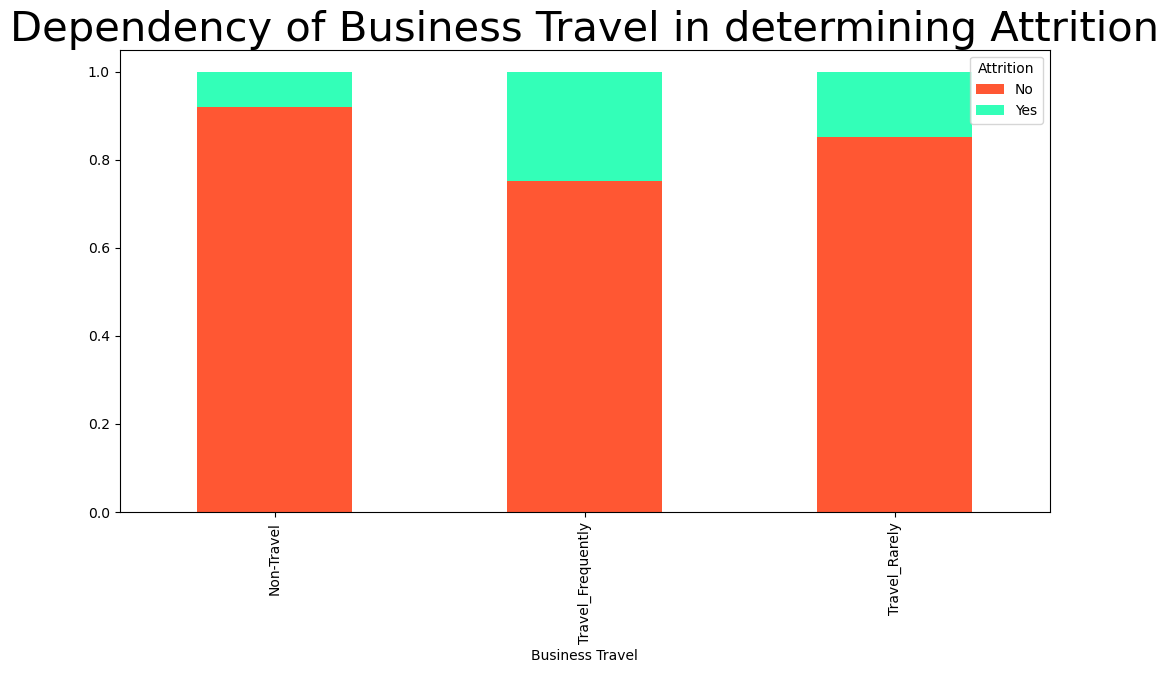

In [19]:
custom_colors = ['#FF5733', '#33FFB8']  # Replace these colors with your desired colors

data = pd.crosstab(df['BusinessTravel'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=custom_colors, figsize=(12, 6))
plt.title('Dependency of Business Travel in determining Attrition', fontsize=30)
plt.xlabel('Business Travel')
plt.show()


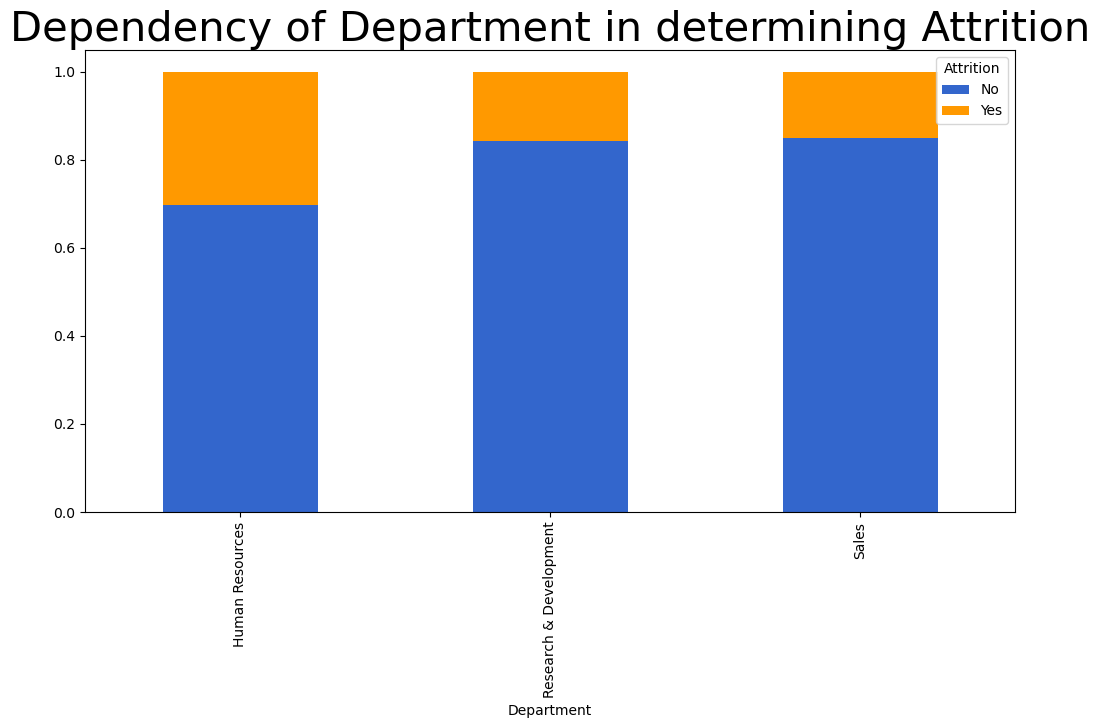

In [20]:
custom_colors = ['#3366cc', '#ff9900'] # Replace these colors with your desired colors

data = pd.crosstab(df['Department'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=custom_colors, figsize=(12, 6))
plt.title('Dependency of Department in determining Attrition', fontsize=30)
plt.xlabel('Department')
plt.show()


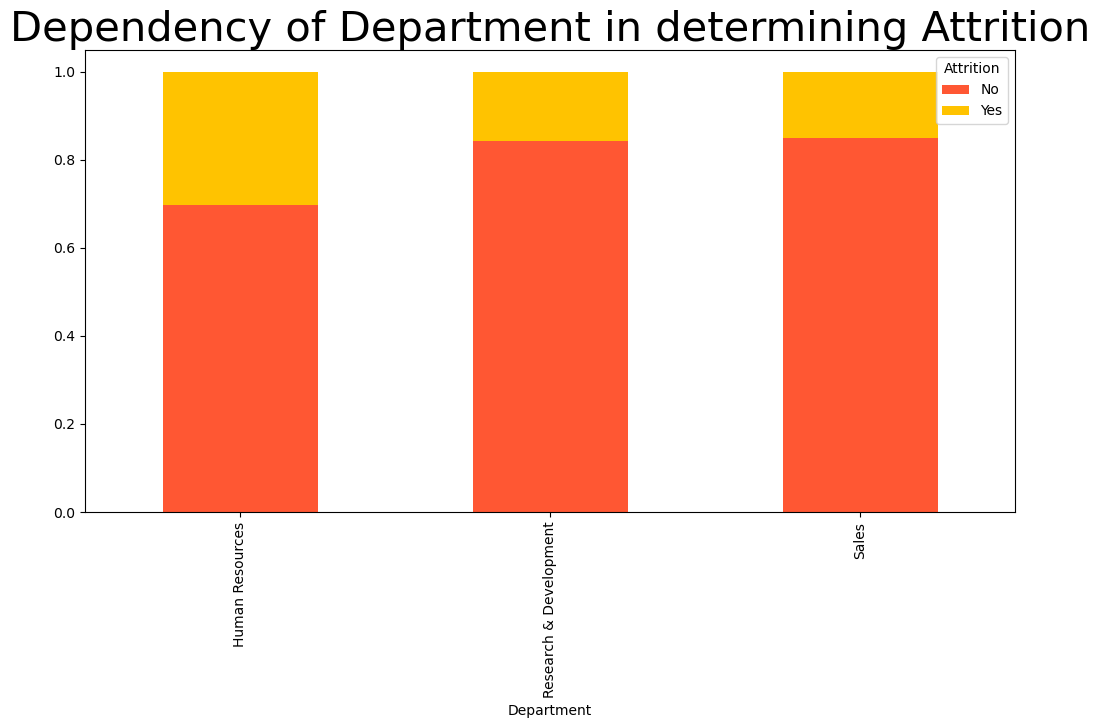

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

custom_colors = ['#FF5733', '#FFC300']  # Replace these colors with your desired colors

data = pd.crosstab(df['Department'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=custom_colors, figsize=(12, 6))
plt.title('Dependency of Department in determining Attrition', fontsize=30)
plt.xlabel('Department')
plt.show()


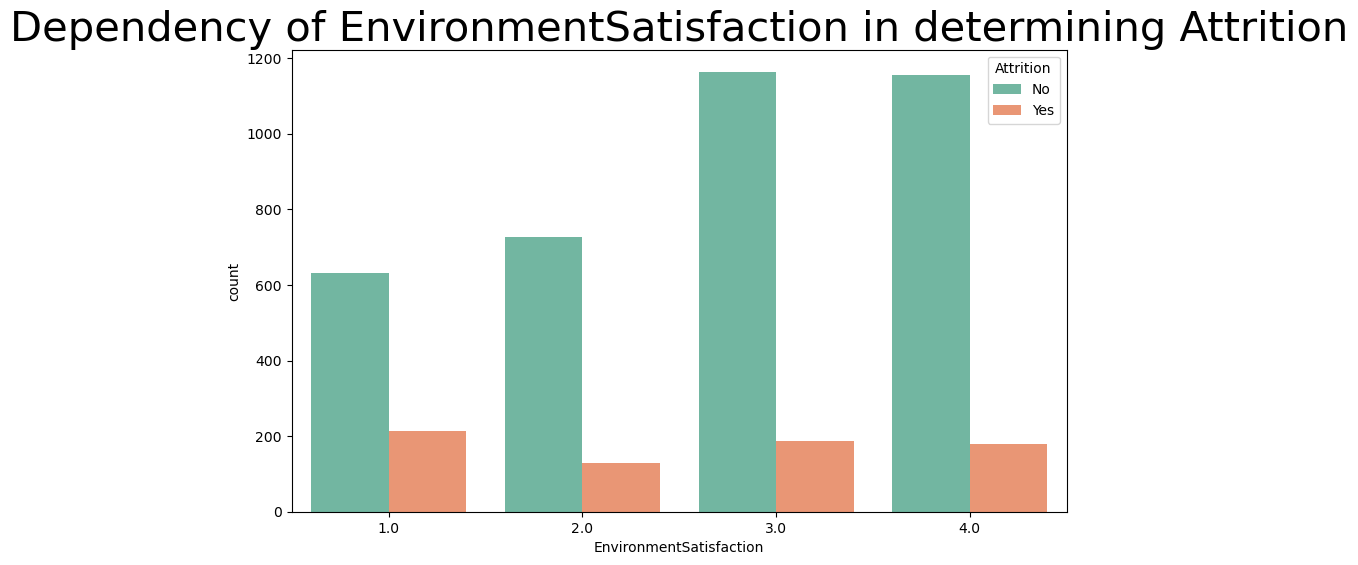

In [22]:
plt.figure(figsize=(10,6))
sns.countplot('EnvironmentSatisfaction', hue='Attrition', data=df, palette='Set2')
plt.title('Dependency of EnvironmentSatisfaction in determining Attrition', fontsize=30)
plt.xlabel('EnvironmentSatisfaction')
plt.show()

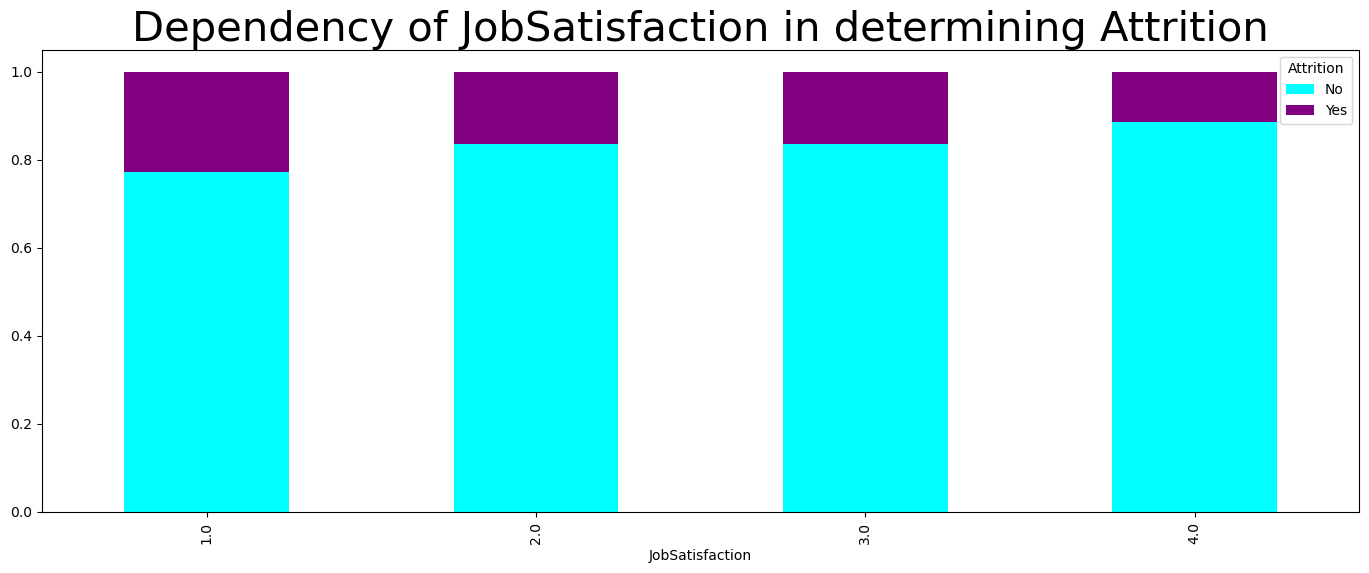

In [23]:
data=pd.crosstab(df['JobSatisfaction'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['cyan', 'purple'], figsize=(17,6))
plt.title('Dependency of JobSatisfaction in determining Attrition', fontsize=30)
plt.xlabel('JobSatisfaction')
plt.show()

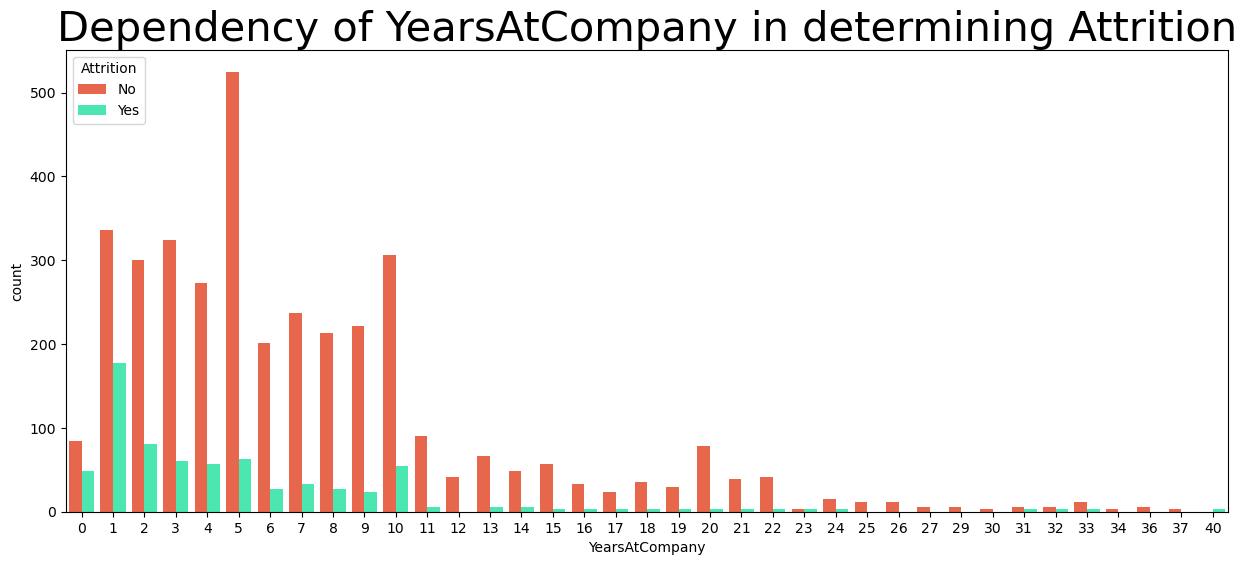

In [24]:
custom_palette = ['#FF5733', '#33FFB8']  # Replace these colors with your desired colors

plt.figure(figsize=(15, 6))
sns.countplot('YearsAtCompany', hue='Attrition', data=df, palette=custom_palette)
plt.title('Dependency of YearsAtCompany in determining Attrition', fontsize=30)
plt.xlabel('YearsAtCompany')
plt.show()


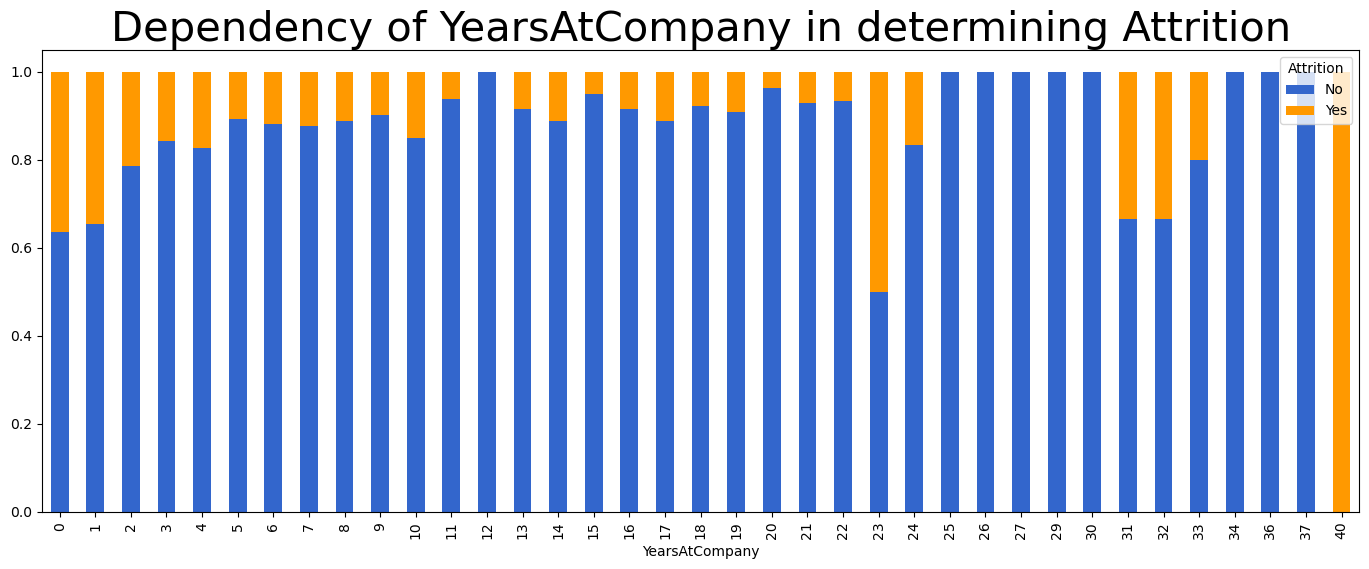

In [25]:
custom_colors = ['#3366cc', '#ff9900']  # Replace these colors with your desired colors

data = pd.crosstab(df['YearsAtCompany'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=custom_colors, figsize=(17, 6))
plt.title('Dependency of YearsAtCompany in determining Attrition', fontsize=30)
plt.xlabel('YearsAtCompany')
plt.show()


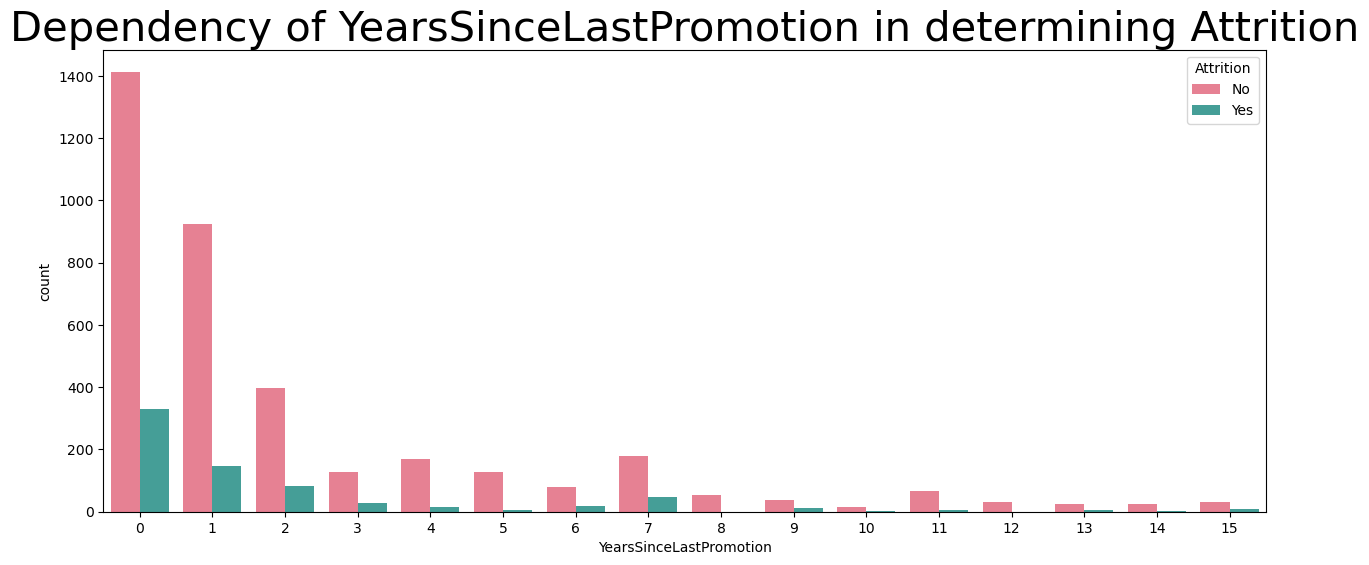

In [26]:
plt.figure(figsize=(15, 6))
sns.countplot('YearsSinceLastPromotion', hue='Attrition', data=df, palette='husl')
plt.title('Dependency of YearsSinceLastPromotion in determining Attrition', fontsize=30)
plt.xlabel('YearsSinceLastPromotion')
plt.show()


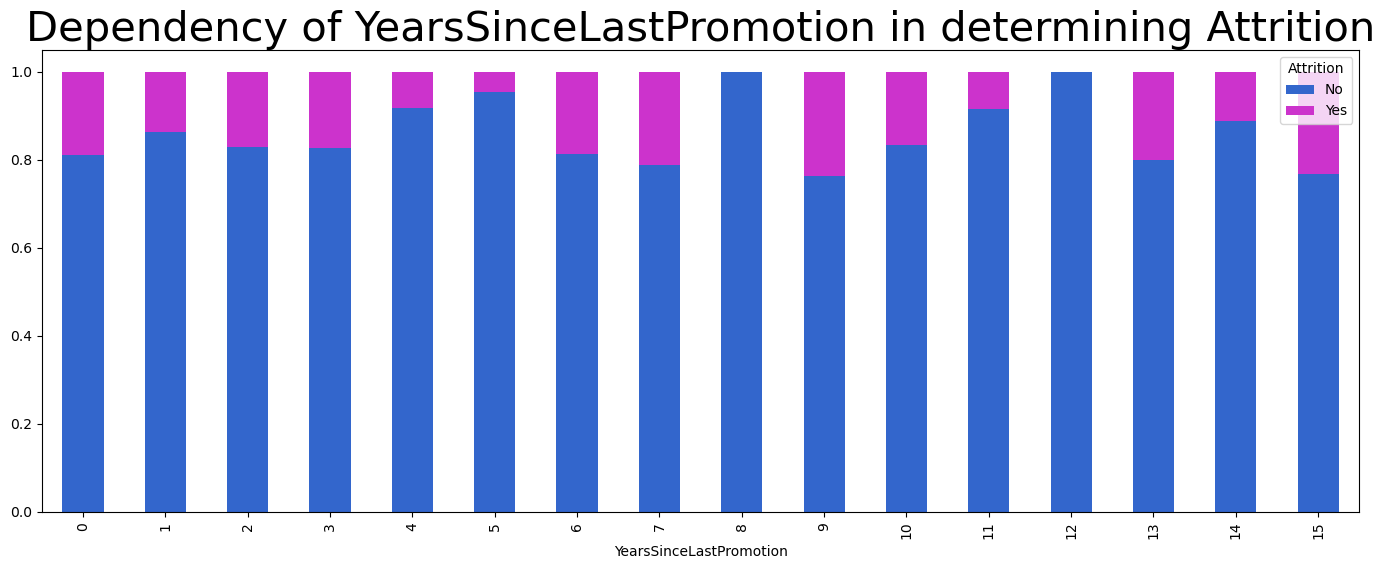

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

custom_colors = ['#3366cc', '#cc33cc'] # Replace these colors with your desired colors

data = pd.crosstab(df['YearsSinceLastPromotion'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=custom_colors, figsize=(17, 6))
plt.title('Dependency of YearsSinceLastPromotion in determining Attrition', fontsize=30)
plt.xlabel('YearsSinceLastPromotion')
plt.show()


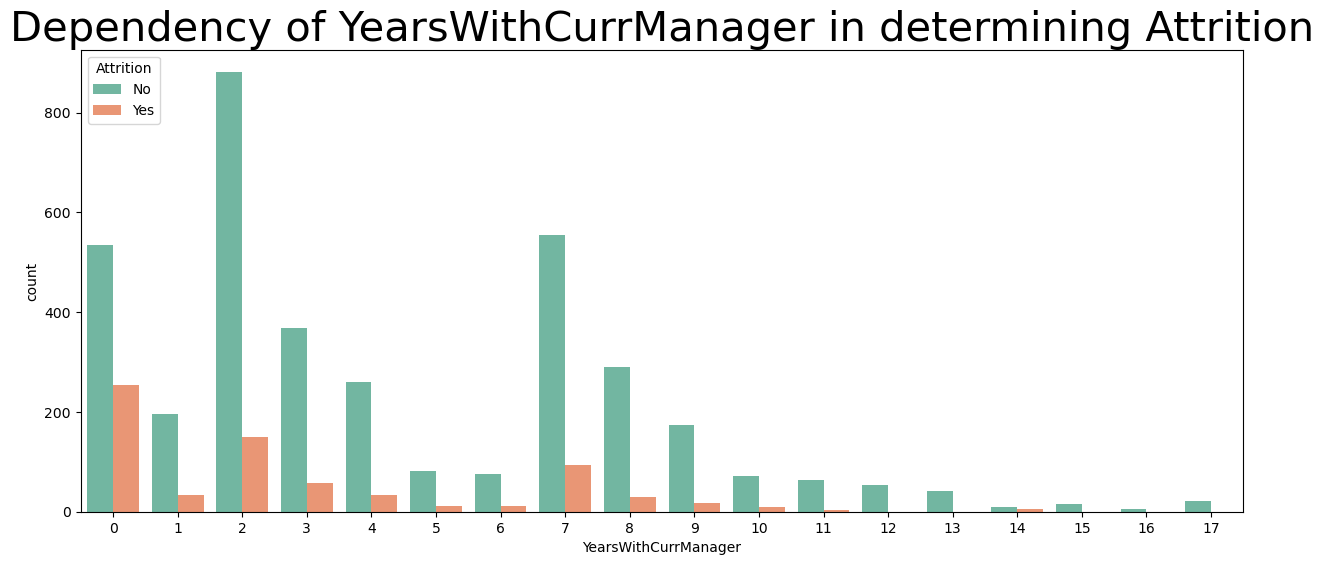

In [28]:
plt.figure(figsize=(15,6))
sns.countplot('YearsWithCurrManager', hue='Attrition', data=df, palette='Set2')
plt.title('Dependency of YearsWithCurrManager in determining Attrition', fontsize=30)
plt.xlabel('YearsWithCurrManager')
plt.show()

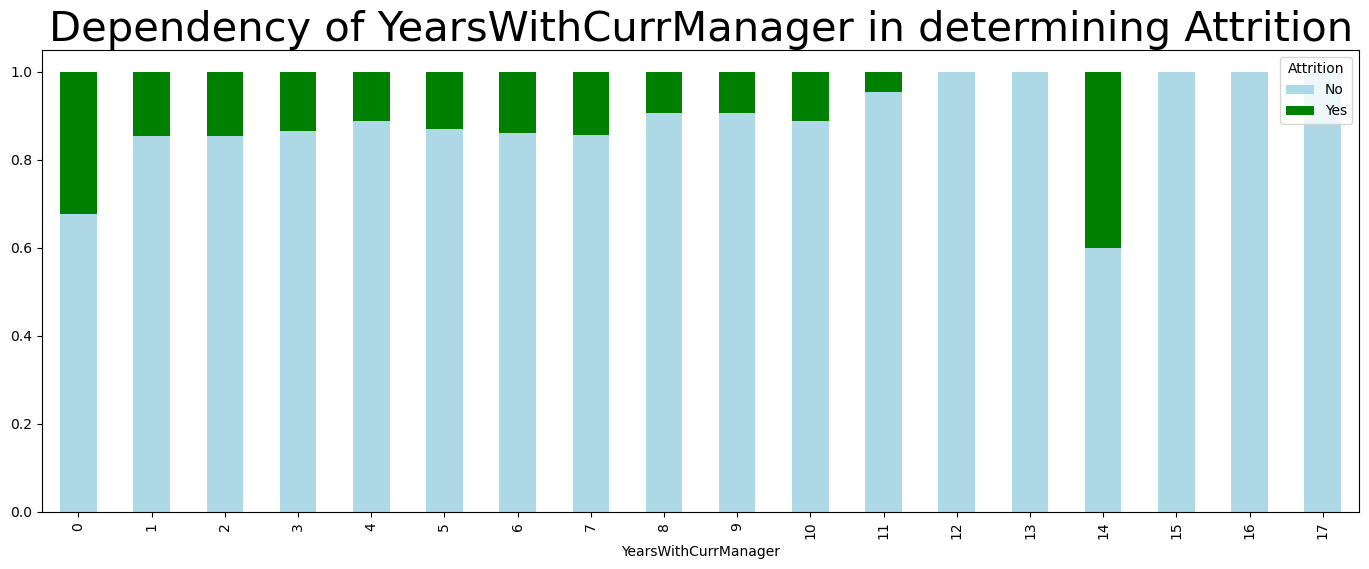

In [29]:
data=pd.crosstab(df['YearsWithCurrManager'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['lightblue', 'green'], 
                                                figsize=(17,6))
plt.title('Dependency of YearsWithCurrManager in determining Attrition', fontsize=30)
plt.xlabel('YearsWithCurrManager')
plt.show()

# Analysis Conclusion :


### Top Reasons why Employees leave the Organization:

1. There will be no overtime. Employees who do not have overtime are more likely to leave the organisation, which was a concern. This could be because employees want to earn more money or because they believe they are underutilised.
    

2. Monthly Income:As expected, income is a major reason why employees leave organisations in search of a higher compensation.
    

3. Age: This is also to be expected, as people planning to retire will depart the organisation. 

Knowing the most common reasons why people leave an organisation can help the organisation take action and reduce attrition.